In [ ]:

# Read the data
file_path = '/Users/yukthabhadane/Documents/Climate Finance Thesis/Policy Brief/v10_jupyter_COP29 Policy Brief_iso_scc_gdpc_gdo_histemi.xlsx'
df = pd.read_excel(file_path, sheet_name='For Plots')

# Print all column names to debug
print("\nAvailable columns in the dataframe:")
for col in df.columns:
    print(f"'{col}'")


For To Do 9, we need to do 

a.	In one plot (in the format as per the below), but the following financier recipient combinations:
i.	Developed -> Developing Countries (as in E-Axes Report)
ii.	Developed funding coalition -> Developing Funding Recipient (as in main plot of Nature Comment) 


/var/folders/n_/wz0dpmns379dn5s9v5qcpxww0000gn/T/ipykernel_4746/2376642223.py:230: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


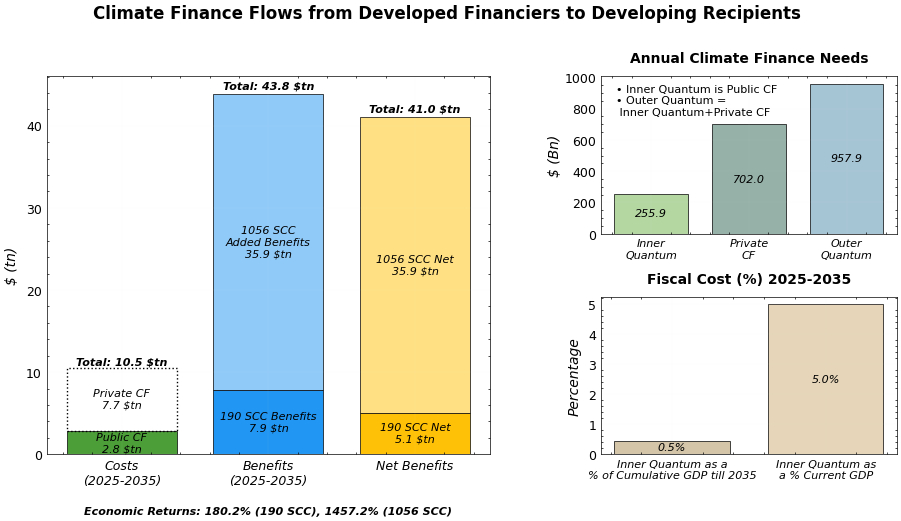


Plots have been saved to: /Users/yukthabhadane/Documents/Climate Finance Thesis/Paper Alissa Jan 2025/To Do 9 plots


/var/folders/n_/wz0dpmns379dn5s9v5qcpxww0000gn/T/ipykernel_4746/2376642223.py:230: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


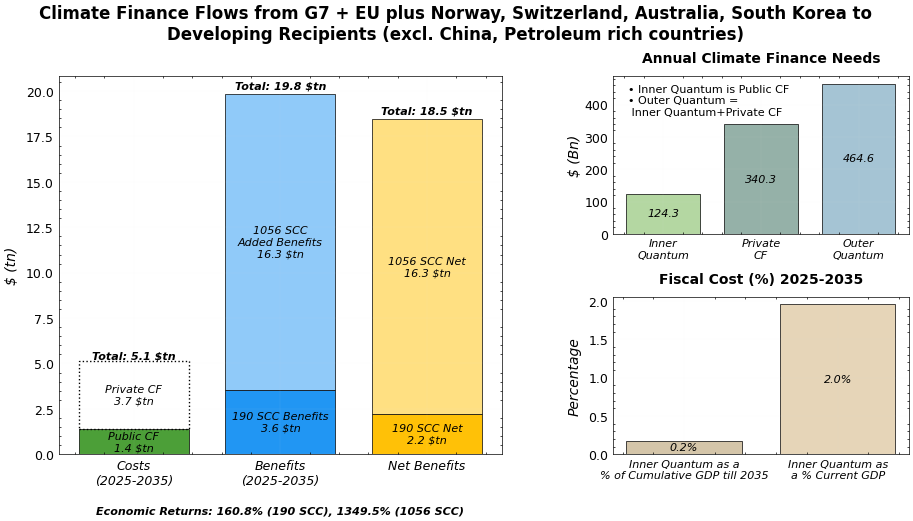


Plots have been saved to: /Users/yukthabhadane/Documents/Climate Finance Thesis/Paper Alissa Jan 2025/To Do 9 plots


/var/folders/n_/wz0dpmns379dn5s9v5qcpxww0000gn/T/ipykernel_4746/2376642223.py:230: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


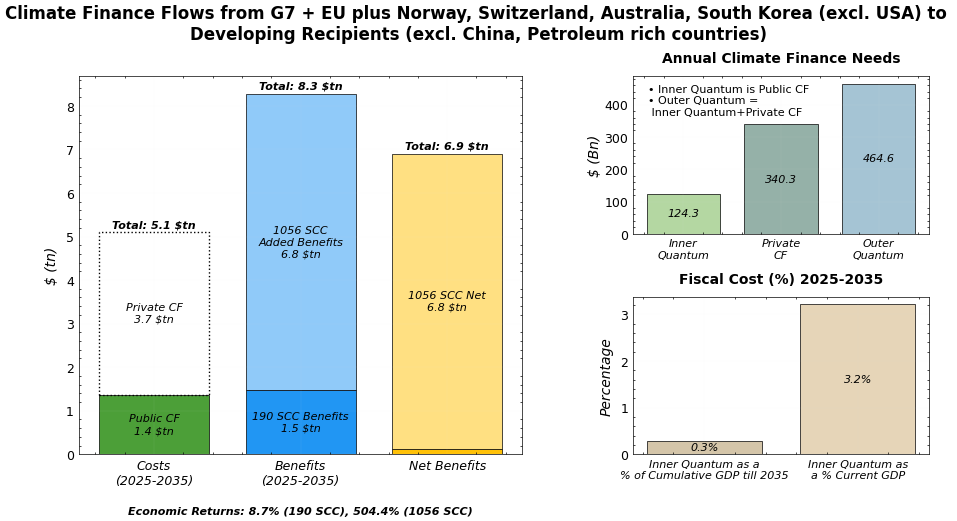


Plots have been saved to: /Users/yukthabhadane/Documents/Climate Finance Thesis/Paper Alissa Jan 2025/To Do 9 plots


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scienceplots

# Read the data
file_path = '/Users/yukthabhadane/Documents/Climate Finance Thesis/Policy Brief/v10_jupyter_COP29 Policy Brief_iso_scc_gdpc_gdo_histemi.xlsx'
df = pd.read_excel(file_path, sheet_name='For Plots')

# Set up the base style
plt.style.use(['science', 'nature', 'light'])

# Refined plot parameters
plt.rcParams.update({
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white',
    'font.family': 'DejaVu Sans',
    'font.size': 9,
    'axes.labelsize': 10,
    'axes.titlesize': 11,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'axes.linewidth': 0.5,
    'grid.linewidth': 0.3,
    'lines.linewidth': 0.8,
    'lines.markersize': 3,
    'axes.spines.top': True,
    'axes.spines.right': True,
    'axes.grid': True,
    'grid.alpha': 0.15,
    'grid.color': '#E5E5E5',
    'text.usetex': False,
})

def create_plots(data_series, variation_name):
    """
    Creates main plot with two smaller subplots on the right
    """
    # Create figure with reduced dimensions
    fig = plt.figure(figsize=(10, 6))
    
    # More precise control over grid layout
    gs = plt.GridSpec(2, 2,
                     width_ratios=[1.5, 1],     # Control width ratio between main and right plots 
                     height_ratios=[1, 1],      # Control heights of right plots
                     left=0.1,                  # Left margin
                     right=0.95,                # Right margin
                     top=0.83,                  # Top margin (leave space for title)
                     bottom=0.2,                # Bottom margin increased for economic returns note
                     hspace=0.4,                # Height space between subplots
                     wspace=0.3)                # Width space between main and right plots
    
    # Create axes
    ax_main = fig.add_subplot(gs[:, 0])        # Main plot uses both rows
    ax_top_right = fig.add_subplot(gs[0, 1])   # Top right subplot
    ax_bottom_right = fig.add_subplot(gs[1, 1]) # Bottom right subplot
    
    # Set the title using the column name (variation) itself
    fig.suptitle(f'Climate Finance Flows from {variation_name}',
                y=0.95, fontsize=12, fontweight='bold')

    # Convert to trillion for main plot
    costs_data = {
        'Public': data_series.iloc[1],
        'Private': data_series.iloc[2],
        'Total': data_series.iloc[0]
    }
    
    benefits_data = {
        'Benefits_190': data_series.iloc[4],
        'Added_Benefits_1056': data_series.iloc[5],
        'Total': data_series.iloc[3]
    }
    
    net_benefits_data = {
        'Net_190': data_series.iloc[7],
        'Added_Net_1056': data_series.iloc[8],
        'Total': data_series.iloc[6]
    }

    # Calculate threshold (5% of maximum total)
    total_all = max(costs_data['Total'], benefits_data['Total'], net_benefits_data['Total'])
    threshold = 0.05 * total_all

    # MAIN PLOT
    bar_width = 0.75
    bar_positions = np.arange(3)
    
    # Helper function for labels
    def add_bar_label(ax, x, y, label, value, threshold=0):
        if value > threshold:
            ax.text(x, y, f'{label}\n{value:.1f} $tn',
                   ha='center', va='center', fontsize=8,
                   style='italic', zorder=5)

    # Costs bars
    ax_main.bar(bar_positions[0], costs_data['Public'], bar_width,
                color='#4C9F38', edgecolor='black', linewidth=0.5)
    ax_main.bar(bar_positions[0], costs_data['Private'], bar_width,
                bottom=costs_data['Public'], color='none',
                edgecolor='black', linewidth=1, linestyle=':')

    # Labels for costs with threshold
    if costs_data['Public'] > threshold:
        add_bar_label(ax_main, bar_positions[0], costs_data['Public']/2,
                     'Public CF', costs_data['Public'])
    if costs_data['Private'] > threshold:
        add_bar_label(ax_main, bar_positions[0],
                     costs_data['Public'] + costs_data['Private']/2,
                     'Private CF', costs_data['Private'])

    # Benefits bars
    ax_main.bar(bar_positions[1], benefits_data['Benefits_190'],
                bar_width, color='#2196F3', edgecolor='black', linewidth=0.5)
    ax_main.bar(bar_positions[1], benefits_data['Added_Benefits_1056'],
                bar_width, bottom=benefits_data['Benefits_190'],
                color='#90CAF9', edgecolor='black', linewidth=0.5)

    # Labels for benefits with threshold
    if benefits_data['Benefits_190'] > threshold:
        add_bar_label(ax_main, bar_positions[1], benefits_data['Benefits_190']/2,
                     '190 SCC Benefits', benefits_data['Benefits_190'])
    if benefits_data['Added_Benefits_1056'] > threshold:
        add_bar_label(ax_main, bar_positions[1],
                     benefits_data['Benefits_190'] + benefits_data['Added_Benefits_1056']/2,
                     '1056 SCC\nAdded Benefits', benefits_data['Added_Benefits_1056'])

    # Net Benefits bars
    ax_main.bar(bar_positions[2], net_benefits_data['Net_190'],
                bar_width, color='#FFC107', edgecolor='black', linewidth=0.5)
    ax_main.bar(bar_positions[2], net_benefits_data['Added_Net_1056'],
                bar_width, bottom=net_benefits_data['Net_190'],
                color='#FFE082', edgecolor='black', linewidth=0.5)

    # Labels for net benefits with threshold
    if net_benefits_data['Net_190'] > threshold:
        add_bar_label(ax_main, bar_positions[2], net_benefits_data['Net_190']/2,
                     '190 SCC Net', net_benefits_data['Net_190'])
    if net_benefits_data['Added_Net_1056'] > threshold:
        add_bar_label(ax_main, bar_positions[2],
                     net_benefits_data['Net_190'] + net_benefits_data['Added_Net_1056']/2,
                     '1056 SCC Net', net_benefits_data['Added_Net_1056'])

    # Add totals on top of each bar
    for i, total in enumerate([costs_data['Total'], benefits_data['Total'], net_benefits_data['Total']]):
        ax_main.text(bar_positions[i], total * 1.01,
                    f'Total: {total:.1f} $tn',
                    ha='center', va='bottom', fontsize=8, style='italic', fontweight='bold')

    # Add economic returns note at bottom
    returns_note = f'Economic Returns: {data_series.iloc[9]:.1f}% (190 SCC), {data_series.iloc[10]:.1f}% (1056 SCC)'
    ax_main.text(0.5, -0.15, returns_note,
                ha='center', va='center',
                transform=ax_main.transAxes,
                fontweight='bold', style='italic',
                fontsize=8)

    # Remove ticks
    ax_main.tick_params(length=0)
    ax_top_right.tick_params(length=0)
    ax_bottom_right.tick_params(length=0)

    # Customize main plot
    ax_main.set_ylabel('$ (tn)', style='italic', labelpad=5)
    ax_main.set_xticks(bar_positions)
    ax_main.set_xticklabels(['Costs\n(2025-2035)', 'Benefits\n(2025-2035)', 
                            'Net Benefits'], style='italic')

    # RIGHT SUBPLOTS with muted colors
    # Annual Climate Finance (Top Right)
    annual_data = {
        'Inner Quantum': data_series.iloc[11] * 1000,  # Convert to billion
        'Private CF': data_series.iloc[12] * 1000,
        'Outer Quantum': data_series.iloc[13] * 1000
    }
    
    bar_positions_annual = np.arange(3)
    colors_annual = ['#B4D7A2', '#95B1A8', '#A5C4D4']  # Muted colors
    
    for i, (key, value) in enumerate(annual_data.items()):
        bar = ax_top_right.bar(bar_positions_annual[i], value, bar_width,
                              color=colors_annual[i], edgecolor='black',
                              linewidth=0.5)
        ax_top_right.text(bar_positions_annual[i], value/2,
                         f'{value:.1f}',
                         ha='center', va='center', fontsize=8,
                         style='italic')

    # Fiscal Cost (Bottom Right)
    fiscal_data = {
        'Inner Quantum/\nCumul. GDP': data_series.iloc[14],  # Already in percentage
        'Inner Quantum/\n2024 GDP': data_series.iloc[15]
    }
    
    bar_positions_fiscal = np.arange(2)
    colors_fiscal = ['#D4C5A9', '#E6D5B8']  # Muted colors
    
    for i, (key, value) in enumerate(fiscal_data.items()):
        if value > 0:
            bar = ax_bottom_right.bar(bar_positions_fiscal[i], value, bar_width,
                                    color=colors_fiscal[i], edgecolor='black',
                                    linewidth=0.5)
            ax_bottom_right.text(bar_positions_fiscal[i], value/2,
                               f'{value:.1f}%',
                               ha='center', va='center', fontsize=8,
                               style='italic')

    # Customize subplots
    ax_top_right.set_title('Annual Climate Finance Needs', pad=10, fontsize=10,
                          fontweight='bold')
    ax_top_right.set_ylabel('$ (Bn)', style='italic', labelpad=2)
    ax_top_right.set_xticks(bar_positions_annual)
    ax_top_right.set_xticklabels(['Inner\nQuantum', 'Private\nCF', 'Outer\nQuantum'],
                                fontsize=8, style='italic')

    # Add notes with italic style
    note_text = '• Inner Quantum is Public CF\n• Outer Quantum =\n Inner Quantum+Private CF'
    ax_top_right.text(0.05, 0.95, note_text,
                     transform=ax_top_right.transAxes,
                     fontsize=8, va='top')

    ax_bottom_right.set_title('Fiscal Cost (%) 2025-2035', pad=10, fontsize=10,
                             fontweight='bold')
    ax_bottom_right.set_ylabel('Percentage', style='italic', labelpad=5)
    ax_bottom_right.set_xticks(bar_positions_fiscal)
    ax_bottom_right.set_xticklabels(['Inner Quantum as a\n% of Cumulative GDP till 2035', 
                                    'Inner Quantum as\na % Current GDP'],
                                   fontsize=8, style='italic')
    plt.tight_layout()
    
    # Adjust layout to accommodate suptitle and economic returns note
    plt.subplots_adjust(top=0.85, bottom=0.2)
    
    return fig

# Create plots for specific variations only
selected_variations = [
    'Developed Financiers to Developing Recipients',
    'G7 + EU plus Norway, Switzerland, Australia, South Korea to \nDeveloping Recipients (excl. China, Petroleum rich countries) ',
    'G7 + EU plus Norway, Switzerland, Australia, South Korea (excl. USA) to \nDeveloping Recipients (excl. China, Petroleum rich countries)'
]

# Filter variations that exist in the dataframe
available_variations = [var for var in selected_variations if var in df.columns]

# Create output directory if it doesn't exist
import os
output_dir = '/Users/yukthabhadane/Documents/Climate Finance Thesis/Paper Alissa Jan 2025/To Do 9 plots'
os.makedirs(output_dir, exist_ok=True)

# Create plots and save them
for variation in available_variations:
    fig = create_plots(df[variation], variation)
    
    # Clean filename by removing special characters and replacing spaces
    clean_filename = variation.replace('\n', ' ').replace('/', '_').replace('\\', '_')
    clean_filename = ''.join(c if c.isalnum() or c in (' ', '_', '-', '.') else '_' for c in clean_filename)
    clean_filename = clean_filename.strip()
    
    # Save the plot with high resolution
    filepath = os.path.join(output_dir, f"{clean_filename}.png")
    fig.savefig(filepath, dpi=300, bbox_inches='tight', pad_inches=0.1)
    
    plt.show()
    plt.close(fig)  # Clean up memory

    print(f"\nPlots have been saved to: {output_dir}")


b.	In one plot (if possible; in the format as per below), but with the following financier- recipient combinations:
i.	Financier China – Recipient China
ii.	Financier South Korea – Recipient South Korea
iii.	Financier United Arab Emirates – Recipient United Emirates
iv.	Financier Saudi Arabia – Recipient Saudi Arabia
v.	Financier Qatar – Recipient Qatar
vi.	Financier Bahrain – Recipient Bahrain
vii.	Financier Brunei Darussalam - Recipient Brunei Darussalam
viii.	Financier Kuwait – Recipient Kuwait 


 Air Pollution Lower and Higher estimates to be included. - not included rn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
/var/folders/n_/wz0dpmns379dn5s9v5qcpxww0000gn/T/ipykernel_61177/782951654.py:214: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


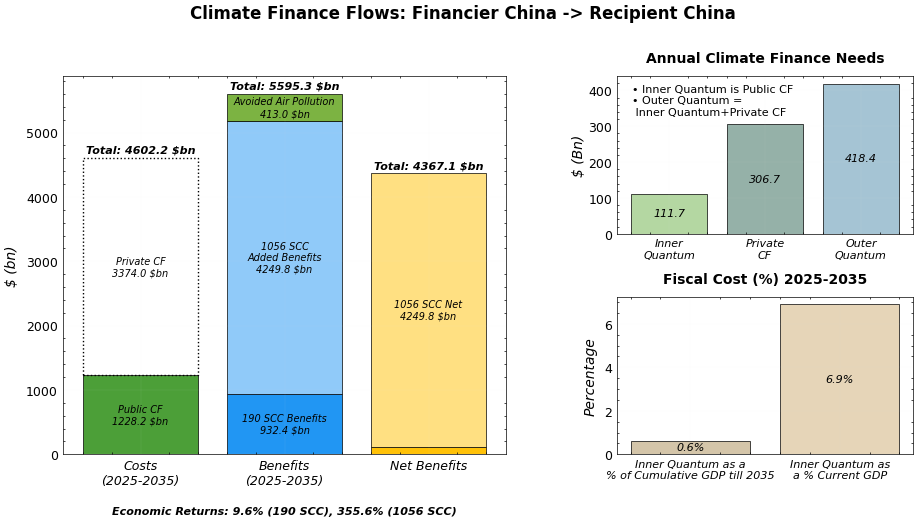

/var/folders/n_/wz0dpmns379dn5s9v5qcpxww0000gn/T/ipykernel_61177/782951654.py:214: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


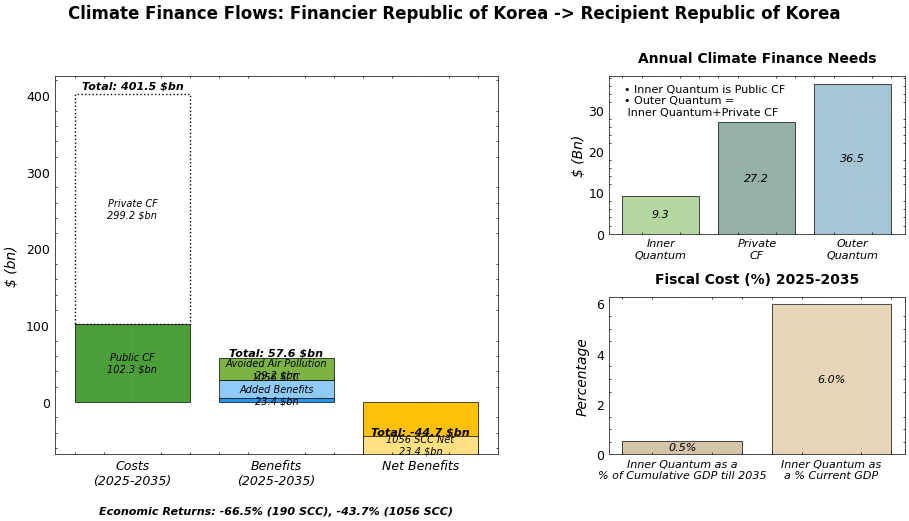

/var/folders/n_/wz0dpmns379dn5s9v5qcpxww0000gn/T/ipykernel_61177/782951654.py:214: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


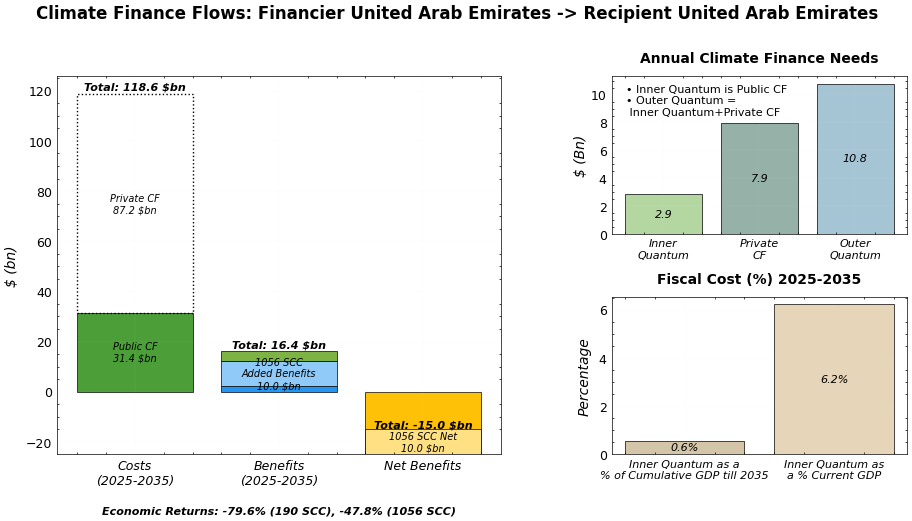

/var/folders/n_/wz0dpmns379dn5s9v5qcpxww0000gn/T/ipykernel_61177/782951654.py:214: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


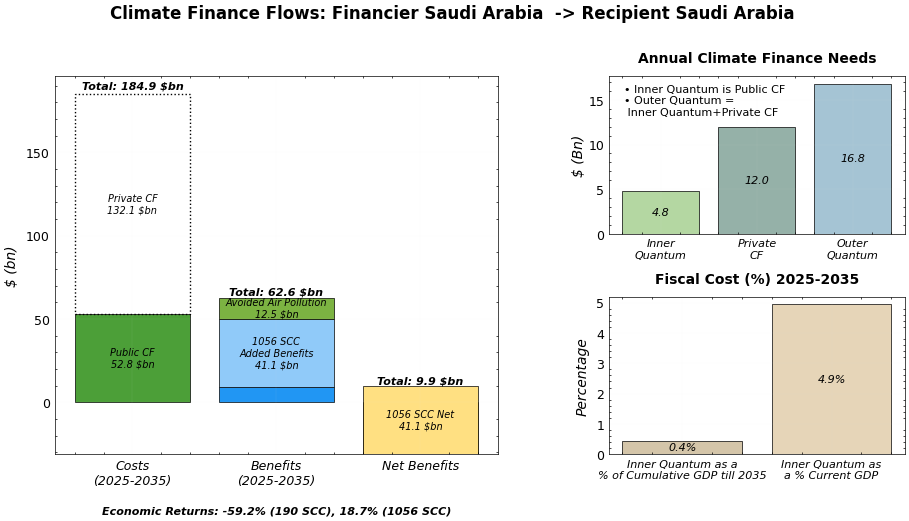

/var/folders/n_/wz0dpmns379dn5s9v5qcpxww0000gn/T/ipykernel_61177/782951654.py:214: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


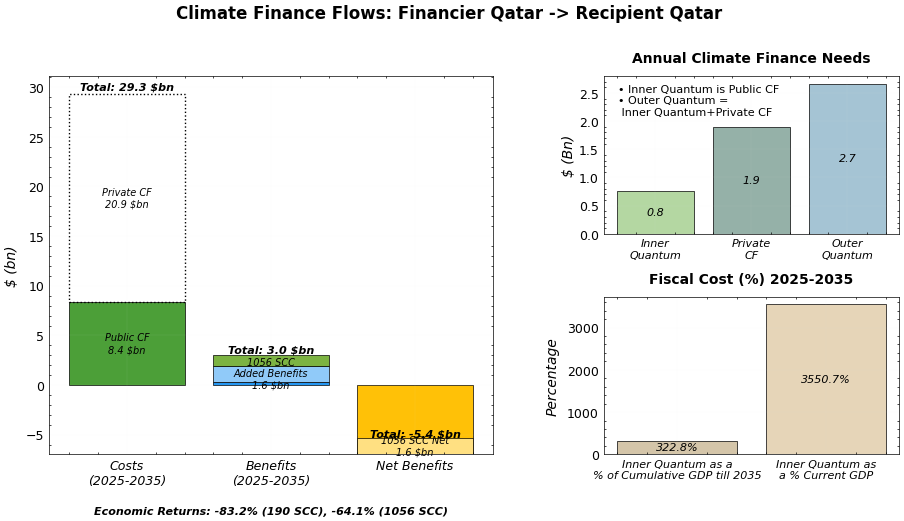

/var/folders/n_/wz0dpmns379dn5s9v5qcpxww0000gn/T/ipykernel_61177/782951654.py:214: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


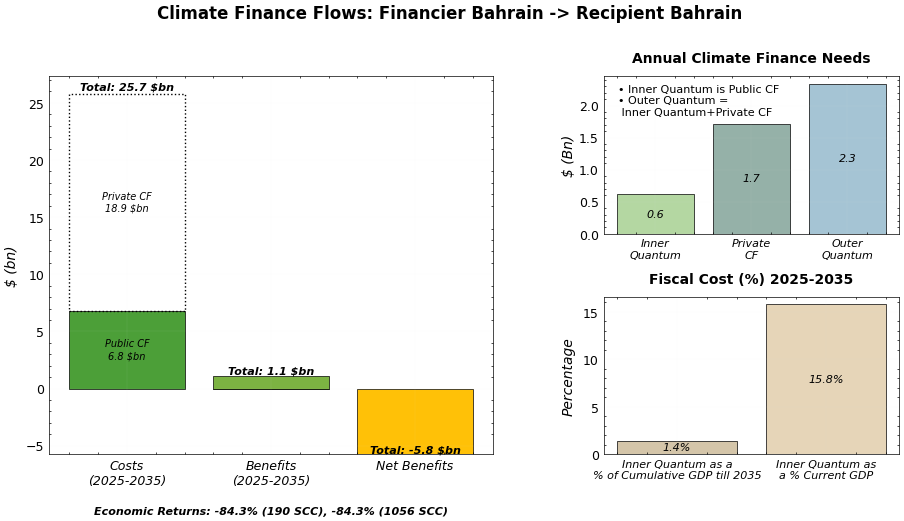

/var/folders/n_/wz0dpmns379dn5s9v5qcpxww0000gn/T/ipykernel_61177/782951654.py:214: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


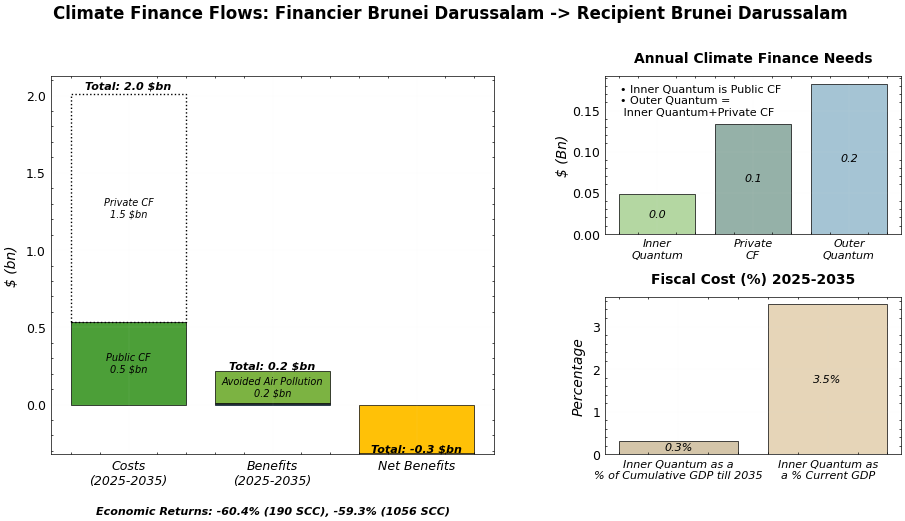

/var/folders/n_/wz0dpmns379dn5s9v5qcpxww0000gn/T/ipykernel_61177/782951654.py:214: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


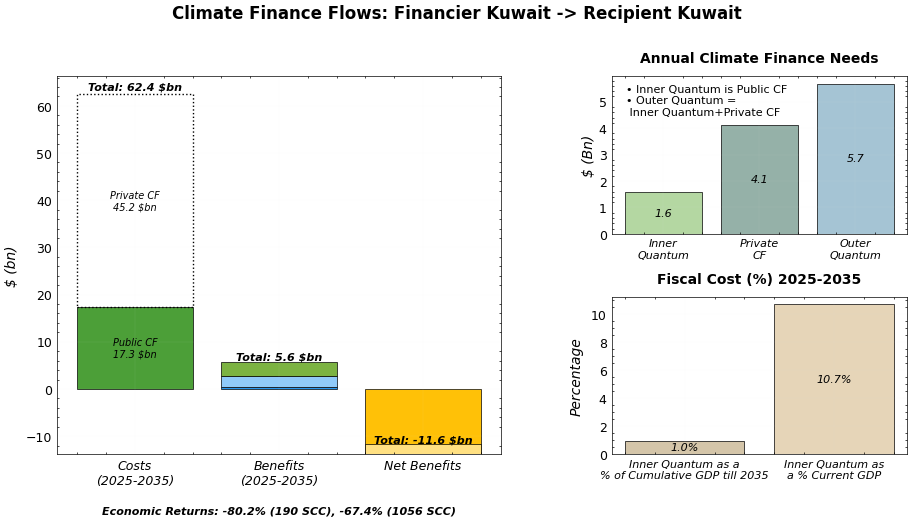

All plots have been saved to: /Users/yukthabhadane/Documents/Climate Finance Thesis/Paper Alissa Jan 2025/country decarbonising itself


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scienceplots

def create_plots(data_series, variation_name):
    """
    Creates main plot with two smaller subplots on the right
    """
    # Create figure with reduced dimensions
    fig = plt.figure(figsize=(10, 6))
    
    # More precise control over grid layout
    gs = plt.GridSpec(2, 2,
                     width_ratios=[1.5, 1],
                     height_ratios=[1, 1],
                     left=0.1,
                     right=0.95,
                     top=0.83,
                     bottom=0.2,
                     hspace=0.4,
                     wspace=0.3)
    
    # Create axes
    ax_main = fig.add_subplot(gs[:, 0])
    ax_top_right = fig.add_subplot(gs[0, 1])
    ax_bottom_right = fig.add_subplot(gs[1, 1])
    
    fig.suptitle(f'Climate Finance Flows: Financier {variation_name} -> Recipient {variation_name}',
                y=0.95, fontsize=12, fontweight='bold')

    # Data is already in billions
    costs_data = {
        'Public': data_series['Public Climate Finance'],
        'Private': data_series['Private Climate Finance'],
        'Total': data_series['Costs ']  # Note the space after Costs
    }
    
    benefits_data = {
        'Benefits_190': data_series['CC Benefits 190 SCC'],
        'Added_Benefits_1056': data_series['CC Added Benefits 1056 SCC'],
        'Air_Pollution': data_series['Added Avoided Air Pollution Benefits '],
        'Total': (data_series['CC Benefits 1056 SCC '] + 
                 data_series['Added Avoided Air Pollution Benefits '])
    }
    
    net_benefits_data = {
        'Net_190': data_series['Net Benefit 190 SCC'],
        'Added_Net_1056': data_series['Added Net Benefits 1056 SCC'],
        'Total': data_series['Net Benefit 1056 SCC']
    }

    # Calculate threshold
    total_all = max(costs_data['Total'], benefits_data['Total'], net_benefits_data['Total'])
    threshold = 0.05 * total_all

    # MAIN PLOT
    bar_width = 0.8
    bar_positions = np.arange(3)
    
    def add_bar_label(ax, x, y, label, value, threshold=0):
        if value > threshold:
            ax.text(x, y, f'{label}\n{value:.1f} $bn',
                   ha='center', va='center', fontsize=7,
                   style='italic', zorder=5)

    # Costs bars
    ax_main.bar(bar_positions[0], costs_data['Public'], bar_width,
                color='#4C9F38', edgecolor='black', linewidth=0.5)
    ax_main.bar(bar_positions[0], costs_data['Private'], bar_width,
                bottom=costs_data['Public'], color='none',
                edgecolor='black', linewidth=1, linestyle=':')

    if costs_data['Public'] > threshold:
        add_bar_label(ax_main, bar_positions[0], costs_data['Public']/2,
                     'Public CF', costs_data['Public'])
    if costs_data['Private'] > threshold:
        add_bar_label(ax_main, bar_positions[0],
                     costs_data['Public'] + costs_data['Private']/2,
                     'Private CF', costs_data['Private'])

    # Benefits bars
    current_bottom = 0
    
    # Base Benefits (190 SCC)
    ax_main.bar(bar_positions[1], benefits_data['Benefits_190'],
                bar_width, color='#2196F3', edgecolor='black', linewidth=0.5)
    if benefits_data['Benefits_190'] > threshold:
        add_bar_label(ax_main, bar_positions[1], benefits_data['Benefits_190']/2,
                     '190 SCC Benefits', benefits_data['Benefits_190'])
    current_bottom += benefits_data['Benefits_190']
    
    # Added Benefits (1056 SCC)
    ax_main.bar(bar_positions[1], benefits_data['Added_Benefits_1056'],
                bar_width, bottom=current_bottom,
                color='#90CAF9', edgecolor='black', linewidth=0.5)
    if benefits_data['Added_Benefits_1056'] > threshold:
        add_bar_label(ax_main, bar_positions[1],
                     current_bottom + benefits_data['Added_Benefits_1056']/2,
                     '1056 SCC\nAdded Benefits', benefits_data['Added_Benefits_1056'])
    current_bottom += benefits_data['Added_Benefits_1056']
    
    # Air Pollution Benefits
    ax_main.bar(bar_positions[1], benefits_data['Air_Pollution'],
                bar_width, bottom=current_bottom,
                color='#7CB342', edgecolor='black', linewidth=0.5)
    if benefits_data['Air_Pollution'] > threshold:
        add_bar_label(ax_main, bar_positions[1],
                     current_bottom + benefits_data['Air_Pollution']/2,
                     'Avoided Air Pollution', benefits_data['Air_Pollution'])

    # Net Benefits bars
    current_bottom = 0
    
    # Base Net Benefits (190 SCC)
    ax_main.bar(bar_positions[2], net_benefits_data['Net_190'],
                bar_width, color='#FFC107', edgecolor='black', linewidth=0.5)
    if net_benefits_data['Net_190'] > threshold:
        add_bar_label(ax_main, bar_positions[2], net_benefits_data['Net_190']/2,
                     '190 SCC Net', net_benefits_data['Net_190'])
    current_bottom += net_benefits_data['Net_190']
    
    # Added Net Benefits (1056 SCC)
    ax_main.bar(bar_positions[2], net_benefits_data['Added_Net_1056'],
                bar_width, bottom=current_bottom,
                color='#FFE082', edgecolor='black', linewidth=0.5)
    if net_benefits_data['Added_Net_1056'] > threshold:
        add_bar_label(ax_main, bar_positions[2],
                     current_bottom + net_benefits_data['Added_Net_1056']/2,
                     '1056 SCC Net', net_benefits_data['Added_Net_1056'])

    # Add totals on top of each bar
    for i, total in enumerate([costs_data['Total'], benefits_data['Total'], net_benefits_data['Total']]):
        ax_main.text(bar_positions[i], total * 1.01,
                    f'Total: {total:.1f} $bn',
                    ha='center', va='bottom', fontsize=8, style='italic', fontweight='bold')

    # Add economic returns note at bottom
    returns_note = f'Economic Returns: {data_series["Return % 190 SCC"]:.1f}% (190 SCC), {data_series["Return % 1056 SCC"]:.1f}% (1056 SCC)'
    ax_main.text(0.5, -0.15, returns_note,
                ha='center', va='center',
                transform=ax_main.transAxes,
                fontweight='bold', style='italic',
                fontsize=8)

    # RIGHT SUBPLOTS
    annual_data = {
        'Inner Quantum': data_series['Annual Inner Quantum'],
        'Private CF': data_series['Annual Private CF'],
        'Outer Quantum': data_series['Annual Outer Quantum']
    }
    
    bar_positions_annual = np.arange(3)
    colors_annual = ['#B4D7A2', '#95B1A8', '#A5C4D4']
    
    for i, (key, value) in enumerate(annual_data.items()):
        bar = ax_top_right.bar(bar_positions_annual[i], value, bar_width,
                              color=colors_annual[i], edgecolor='black',
                              linewidth=0.5)
        ax_top_right.text(bar_positions_annual[i], value/2,
                         f'{value:.1f}',
                         ha='center', va='center', fontsize=8,
                         style='italic')

    fiscal_data = {
        'Inner Quantum/\nCumul. GDP': data_series['Inner Quantum/Cumul. GDP'],
        'Inner Quantum/\n2024 GDP': data_series['Inner Quantum/2024 GDP']
    }
    
    bar_positions_fiscal = np.arange(2)
    colors_fiscal = ['#D4C5A9', '#E6D5B8']
    
    for i, (key, value) in enumerate(fiscal_data.items()):
        if value > 0:
            bar = ax_bottom_right.bar(bar_positions_fiscal[i], value, bar_width,
                                    color=colors_fiscal[i], edgecolor='black',
                                    linewidth=0.5)
            ax_bottom_right.text(bar_positions_fiscal[i], value/2,
                               f'{value:.1f}%',
                               ha='center', va='center', fontsize=8,
                               style='italic')

    # Customize all plots
    ax_main.set_ylabel('$ (bn)', style='italic', labelpad=5)
    ax_main.set_xticks(bar_positions)
    ax_main.set_xticklabels(['Costs\n(2025-2035)', 'Benefits\n(2025-2035)', 
                            'Net Benefits'], style='italic')

    ax_top_right.set_title('Annual Climate Finance Needs', pad=10, fontsize=10,
                          fontweight='bold')
    ax_top_right.set_ylabel('$ (Bn)', style='italic', labelpad=2)
    ax_top_right.set_xticks(bar_positions_annual)
    ax_top_right.set_xticklabels(['Inner\nQuantum', 'Private\nCF', 'Outer\nQuantum'],
                                fontsize=8, style='italic')

    note_text = '• Inner Quantum is Public CF\n• Outer Quantum =\n Inner Quantum+Private CF'
    ax_top_right.text(0.05, 0.95, note_text,
                     transform=ax_top_right.transAxes,
                     fontsize=8, va='top')

    ax_bottom_right.set_title('Fiscal Cost (%) 2025-2035', pad=10, fontsize=10,
                             fontweight='bold')
    ax_bottom_right.set_ylabel('Percentage', style='italic', labelpad=5)
    ax_bottom_right.set_xticks(bar_positions_fiscal)
    ax_bottom_right.set_xticklabels(['Inner Quantum as a\n% of Cumulative GDP till 2035', 
                                    'Inner Quantum as\na % Current GDP'],
                                   fontsize=8, style='italic')

    # Remove ticks from all plots
    ax_main.tick_params(length=0)
    ax_top_right.tick_params(length=0)
    ax_bottom_right.tick_params(length=0)

    plt.tight_layout()
    plt.subplots_adjust(top=0.85, bottom=0.2)
    
    return fig

# Set up the base style
plt.style.use(['science', 'nature', 'light'])

# Refined plot parameters
plt.rcParams.update({
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white',
    'font.family': 'DejaVu Sans',
    'font.size': 9,
    'axes.labelsize': 10,
    'axes.titlesize': 11,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'axes.linewidth': 0.5,
    'grid.linewidth': 0.3,
    'lines.linewidth': 0.8,
    'lines.markersize': 3,
    'axes.spines.top': True,
    'axes.spines.right': True,
    'axes.grid': True,
    'grid.alpha': 0.15,
    'grid.color': '#E5E5E5',
    'text.usetex': False,
})

# Read the file
file_path = '/Users/yukthabhadane/Documents/Climate Finance Thesis/Paper Alissa Jan 2025/Excel sheets/jupyter To Do 8 and 9 .xlsx'
sheet_name = 'Country Decarbonising Itself'

# Read the Excel file
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Create output directory if it doesn't exist
import os
output_dir = '/Users/yukthabhadane/Documents/Climate Finance Thesis/Paper Alissa Jan 2025/country decarbonising itself'
os.makedirs(output_dir, exist_ok=True)

# Create and save plots for each variation
for index, row in df.iterrows():
    fig = create_plots(row, row['Variations'])
    
    # Create filename using variation name
    filename = f"NB {row['Variations']}.png"
    filepath = os.path.join(output_dir, filename)
    
    # Save with high DPI for better quality
    fig.savefig(filepath, dpi=300, bbox_inches='tight')
    
    # Show plot (optional - you can comment this out if you don't want to display)
    plt.show()
    
    # Close the figure to free up memory
    plt.close(fig)

print(f"All plots have been saved to: {output_dir}")

In [ ]:
/Users/yukthabhadane/Documents/Climate Finance Thesis/Paper Alissa Jan 2025/Excel sheets/jupyter To Do 8 and 9 .xlsx

In [1]:
import pandas as pd
import numpy as np

# Read the file
file_path = '/Users/yukthabhadane/Documents/Climate Finance Thesis/Paper Alissa Jan 2025/Excel sheets/jupyter To Do 8 and 9 .xlsx'
sheet_name = 'Country Decarbonising Itself'

# Read the Excel file
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Print basic information
print("DataFrame Info:")
print(df.info())
print("\n")

# Print column names
print("Column Names:")
print(df.columns.tolist())
print("\n")

# Print first few rows
print("First few rows:")
print(df.head())
print("\n")

# Print unique values in first column (assuming it might be variation names)
print("Unique values in first column:")
print(df.iloc[:, 0].unique())
print("\n")

# Print row indices for key terms (to find where different metrics are located)
search_terms = ['Public', 'Private', 'Benefits', 'Air Pollution', 'Net']
print("Row indices for key terms:")
for term in search_terms:
    matches = df.iloc[:, 0].str.contains(str(term), na=False)
    if matches.any():
        print(f"{term} found at row(s):", df.index[matches].tolist())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Bn$                                    8 non-null      object 
 1   Variations                             8 non-null      object 
 2   Costs                                  8 non-null      float64
 3   Public Climate Finance                 8 non-null      float64
 4   Private Climate Finance                8 non-null      float64
 5   CC Benefits 1056 SCC                   8 non-null      float64
 6   CC Benefits 190 SCC                    8 non-null      float64
 7   CC Added Benefits 1056 SCC             8 non-null      float64
 8   Net Benefit 1056 SCC                   8 non-null      float64
 9   Net Benefit 190 SCC                    8 non-null      float64
 10  Added Net Benefits 1056 SCC            8 non-null      float64

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


### IFC Slides

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scienceplots

# Define the ISO 2 codes for countries you want to plot
SELECTED_COUNTRIES = [
    'CL',
    'HN',
    'PL',
    'DO',
    'BD',
    'PK'
]

def create_plots(data_series, variation_name):
    """
    Creates main plot with two smaller subplots on the right
    """
    # Create figure with reduced dimensions
    fig = plt.figure(figsize=(10, 6))
    
    # More precise control over grid layout
    gs = plt.GridSpec(2, 2,
                     width_ratios=[1.5, 1],
                     height_ratios=[1, 1],
                     left=0.1,
                     right=0.95,
                     top=0.83,
                     bottom=0.2,
                     hspace=0.4,
                     wspace=0.3)
    
    # Create axes
    ax_main = fig.add_subplot(gs[:, 0])
    ax_top_right = fig.add_subplot(gs[0, 1])
    ax_bottom_right = fig.add_subplot(gs[1, 1])
    
    fig.suptitle(f'Climate Finance Flows: Financier {variation_name} -> Recipient {variation_name}',
                y=0.95, fontsize=12, fontweight='bold')

    # Data is already in billions
    costs_data = {
        'Public': data_series['Public Climate Finance'],
        'Private': data_series['Private Climate Finance'],
        'Total': data_series['Costs']  
    }
    
    benefits_data = {
        'Benefits_190': data_series['CC Benefits 190 SCC (incl APB)'],
        'Added_Benefits_1056': data_series['CC Added Benefits 1056 SCC'],
        'Air_Pollution': data_series['Added Avoided Air Pollution Benefits'],
        'Total': (data_series['CC Benefits 1056 SCC (incl APB)'] + 
                 data_series['Added Avoided Air Pollution Benefits'])
    }
    
    net_benefits_data = {
        'Net_190': data_series['Net Benefit 190 SCC'],
        'Added_Net_1056': data_series['Added Net Benefits 1056 SCC'],
        'Total': data_series['Net Benefit 1056 SCC']
    }

    # Calculate threshold
    total_all = max(costs_data['Total'], benefits_data['Total'], net_benefits_data['Total'])
    threshold = 0.05 * total_all

    # MAIN PLOT
    bar_width = 0.8
    bar_positions = np.arange(3)
    
    def add_bar_label(ax, x, y, label, value, threshold=0):
        if value > threshold:
            ax.text(x, y, f'{label}\n{value:.1f} $bn',
                   ha='center', va='center', fontsize=7,
                   style='italic', zorder=5)

    # Costs bars
    ax_main.bar(bar_positions[0], costs_data['Public'], bar_width,
                color='#4C9F38', edgecolor='black', linewidth=0.5)
    ax_main.bar(bar_positions[0], costs_data['Private'], bar_width,
                bottom=costs_data['Public'], color='none',
                edgecolor='black', linewidth=1, linestyle=':')

    if costs_data['Public'] > threshold:
        add_bar_label(ax_main, bar_positions[0], costs_data['Public']/2,
                     'Public CF', costs_data['Public'])
    if costs_data['Private'] > threshold:
        add_bar_label(ax_main, bar_positions[0],
                     costs_data['Public'] + costs_data['Private']/2,
                     'Private CF', costs_data['Private'])

    # Benefits bars
    current_bottom = 0
    
    # Base Benefits (190 SCC)
    ax_main.bar(bar_positions[1], benefits_data['Benefits_190'],
                bar_width, color='#2196F3', edgecolor='black', linewidth=0.5)
    if benefits_data['Benefits_190'] > threshold:
        add_bar_label(ax_main, bar_positions[1], benefits_data['Benefits_190']/2,
                     '190 SCC Benefits', benefits_data['Benefits_190'])
    current_bottom += benefits_data['Benefits_190']
    
    # Added Benefits (1056 SCC)
    ax_main.bar(bar_positions[1], benefits_data['Added_Benefits_1056'],
                bar_width, bottom=current_bottom,
                color='#90CAF9', edgecolor='black', linewidth=0.5)
    if benefits_data['Added_Benefits_1056'] > threshold:
        add_bar_label(ax_main, bar_positions[1],
                     current_bottom + benefits_data['Added_Benefits_1056']/2,
                     '1056 SCC\nAdded Benefits', benefits_data['Added_Benefits_1056'])
    current_bottom += benefits_data['Added_Benefits_1056']
    
    # Air Pollution Benefits
    ax_main.bar(bar_positions[1], benefits_data['Air_Pollution'],
                bar_width, bottom=current_bottom,
                color='#7CB342', edgecolor='black', linewidth=0.5)
    if benefits_data['Air_Pollution'] > threshold:
        add_bar_label(ax_main, bar_positions[1],
                     current_bottom + benefits_data['Air_Pollution']/2,
                     'Avoided Air Pollution', benefits_data['Air_Pollution'])

    # Net Benefits bars
    current_bottom = 0
    
    # Base Net Benefits (190 SCC)
    ax_main.bar(bar_positions[2], net_benefits_data['Net_190'],
                bar_width, color='#FFC107', edgecolor='black', linewidth=0.5)
    if net_benefits_data['Net_190'] > threshold:
        add_bar_label(ax_main, bar_positions[2], net_benefits_data['Net_190']/2,
                     '190 SCC Net', net_benefits_data['Net_190'])
    current_bottom += net_benefits_data['Net_190']
    
    # Added Net Benefits (1056 SCC)
    ax_main.bar(bar_positions[2], net_benefits_data['Added_Net_1056'],
                bar_width, bottom=current_bottom,
                color='#FFE082', edgecolor='black', linewidth=0.5)
    if net_benefits_data['Added_Net_1056'] > threshold:
        add_bar_label(ax_main, bar_positions[2],
                     current_bottom + net_benefits_data['Added_Net_1056']/2,
                     '1056 SCC Net', net_benefits_data['Added_Net_1056'])

    # Add totals on top of each bar
    for i, total in enumerate([costs_data['Total'], benefits_data['Total'], net_benefits_data['Total']]):
        ax_main.text(bar_positions[i], total * 1.01,
                    f'Total: {total:.1f} $bn',
                    ha='center', va='bottom', fontsize=8, style='italic', fontweight='bold')

    # Add economic returns note at bottom
    returns_note = f'Economic Returns: {data_series["Return % 190 SCC"]:.1f}% (190 SCC), {data_series["Return % 1056 SCC"]:.1f}% (1056 SCC)'
    ax_main.text(0.5, -0.15, returns_note,
                ha='center', va='center',
                transform=ax_main.transAxes,
                fontweight='bold', style='italic',
                fontsize=8)

    # RIGHT SUBPLOTS
    annual_data = {
        'Inner Quantum': data_series['Annual Inner Quantum'],
        'Private CF': data_series['Annual Private CF'],
        'Outer Quantum': data_series['Annual Outer Quantum']
    }
    
    bar_positions_annual = np.arange(3)
    colors_annual = ['#B4D7A2', '#95B1A8', '#A5C4D4']
    
    for i, (key, value) in enumerate(annual_data.items()):
        bar = ax_top_right.bar(bar_positions_annual[i], value, bar_width,
                              color=colors_annual[i], edgecolor='black',
                              linewidth=0.5)
        ax_top_right.text(bar_positions_annual[i], value/2,
                         f'{value:.1f}',
                         ha='center', va='center', fontsize=8,
                         style='italic')

    fiscal_data = {
        'Inner Quantum/\nCumul. GDP': data_series['Inner Quantum/Cumul. GDP'],
        'Inner Quantum/\n2024 GDP': data_series['Inner Quantum/2024 GDP']
    }
    
    bar_positions_fiscal = np.arange(2)
    colors_fiscal = ['#D4C5A9', '#E6D5B8']
    
    for i, (key, value) in enumerate(fiscal_data.items()):
        if pd.notna(value) and value > 0:  # Check for NaN and positive values
            bar = ax_bottom_right.bar(bar_positions_fiscal[i], value, bar_width,
                                    color=colors_fiscal[i], edgecolor='black',
                                    linewidth=0.5)
            ax_bottom_right.text(bar_positions_fiscal[i], value/2,
                               f'{value:.1f}%',
                               ha='center', va='center', fontsize=8,
                               style='italic')

    # Customize all plots
    ax_main.set_ylabel('$ (bn)', style='italic', labelpad=5)
    ax_main.set_xticks(bar_positions)
    ax_main.set_xticklabels(['Costs\n(2025-2035)', 'Benefits\n(2025-2035)', 
                            'Net Benefits'], style='italic')

    ax_top_right.set_title('Annual Climate Finance Needs', pad=10, fontsize=10,
                          fontweight='bold')
    ax_top_right.set_ylabel('$ (Bn)', style='italic', labelpad=2)
    ax_top_right.set_xticks(bar_positions_annual)
    ax_top_right.set_xticklabels(['Inner\nQuantum', 'Private\nCF', 'Outer\nQuantum'],
                                fontsize=8, style='italic')

    note_text = '• Inner Quantum is Public CF\n• Outer Quantum =\n Inner Quantum+Private CF'
    ax_top_right.text(0.05, 0.95, note_text,
                     transform=ax_top_right.transAxes,
                     fontsize=8, va='top')

    ax_bottom_right.set_title('Fiscal Cost (%) 2025-2035', pad=10, fontsize=10,
                             fontweight='bold')
    ax_bottom_right.set_ylabel('Percentage', style='italic', labelpad=5)
    ax_bottom_right.set_xticks(bar_positions_fiscal)
    ax_bottom_right.set_xticklabels(['Inner Quantum as a\n% of Cumulative GDP till 2035', 
                                    'Inner Quantum as\na % Current GDP'],
                                   fontsize=8, style='italic')

    # Remove ticks from all plots
    ax_main.tick_params(length=0)
    ax_top_right.tick_params(length=0)
    ax_bottom_right.tick_params(length=0)

    plt.tight_layout()
    plt.subplots_adjust(top=0.85, bottom=0.2)
    
    return fig

# Set up the base style
plt.style.use(['science', 'nature', 'light'])

# Refined plot parameters
plt.rcParams.update({
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white',
    'font.family': 'DejaVu Sans',
    'font.size': 9,
    'axes.labelsize': 10,
    'axes.titlesize': 11,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'axes.linewidth': 0.5,
    'grid.linewidth': 0.3,
    'lines.linewidth': 0.8,
    'lines.markersize': 3,
    'axes.spines.top': True,
    'axes.spines.right': True,
    'axes.grid': True,
    'grid.alpha': 0.15,
    'grid.color': '#E5E5E5',
    'text.usetex': False,
})

# File paths
file_path = '/Users/yukthabhadane/Documents/Climate Finance Thesis/Paper Alissa Jan 2025/Excel sheets/jupyter To Do 8 and 9 .xlsx'
sheet_name = 'All Cs Decarb 2035'
output_dir = '/Users/yukthabhadane/Documents/Climate Finance Thesis/Paper Alissa Jan 2025/Countries decarb itself 2035'

# Create output directory if it doesn't exist
import os
os.makedirs(output_dir, exist_ok=True)

# Read the Excel file
df = pd.read_excel(file_path, sheet_name=sheet_name, header=1)

# Filter for only selected countries
filtered_df = df[df['Bn $'].isin(SELECTED_COUNTRIES)]

if filtered_df.empty:
    print("No matching countries found. Please check your country codes.")
else:
    print(f"\nProcessing {len(filtered_df)} countries:")
    # Create plots for each selected country
    for index, row in filtered_df.iterrows():
        try:
            # Use country code + name as variation
            variation_name = f"{row['Bn $']} ({row['Variations']})"
            print(f"\nProcessing {variation_name}")
            
            # Print key values for debugging
            print(f"Costs: {row['Costs']}")
            print(f"Public CF: {row['Public Climate Finance']}")
            print(f"Private CF: {row['Private Climate Finance']}")
            
            fig = create_plots(row, variation_name)
            
            # Create filename using country code
            filename = f"NB_{row['Bn $']}.png"
            filepath = os.path.join(output_dir, filename)
            
            # Save with high DPI for better quality
            fig.savefig(filepath, dpi=300, bbox_inches='tight')
            print(f"Successfully created plot for {row['Bn $']}")
            
            plt.close(fig)
            
        except Exception as e:
            print(f"Error processing {row['Bn $']}: {str(e)}")
            continue

    print(f"\nAll plots have been saved to: {output_dir}")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
/var/folders/n_/wz0dpmns379dn5s9v5qcpxww0000gn/T/ipykernel_23256/116484918.py:224: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()



Processing 6 countries:

Processing PL (Poland)
Costs: 123.676001210697
Public CF: 32.310250331647694
Private CF: 91.3657508790493
Successfully created plot for PL

Processing PK (Pakistan)
Costs: 78.50699918344617
Public CF: 21.728249732404947
Private CF: 56.77874945104122


/var/folders/n_/wz0dpmns379dn5s9v5qcpxww0000gn/T/ipykernel_23256/116484918.py:224: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Successfully created plot for PK

Processing CL (Chile)
Costs: 41.46100103389472
Public CF: 11.176000232808292
Private CF: 30.285000801086426


/var/folders/n_/wz0dpmns379dn5s9v5qcpxww0000gn/T/ipykernel_23256/116484918.py:224: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Successfully created plot for CL

Processing DO (Dominican Republic)
Costs: 15.294000448193401
Public CF: 4.288500116672367
Private CF: 11.005500331521034


/var/folders/n_/wz0dpmns379dn5s9v5qcpxww0000gn/T/ipykernel_23256/116484918.py:224: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Successfully created plot for DO

Processing HN (Honduras)
Costs: 4.6120001206872985
Public CF: 1.2752500333590433
Private CF: 3.336750087328255


/var/folders/n_/wz0dpmns379dn5s9v5qcpxww0000gn/T/ipykernel_23256/116484918.py:224: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Successfully created plot for HN

Processing BD (Bangladesh)
Costs: 122.59999802336097
Public CF: 35.14249948784709
Private CF: 87.45749853551388


/var/folders/n_/wz0dpmns379dn5s9v5qcpxww0000gn/T/ipykernel_23256/116484918.py:224: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Successfully created plot for BD

All plots have been saved to: /Users/yukthabhadane/Documents/Climate Finance Thesis/Paper Alissa Jan 2025/Countries decarb itself 2035


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scienceplots

# Read the data
file_path = '/Users/yukthabhadane/Documents/Climate Finance Thesis/Paper Alissa Jan 2025/Excel sheets/jupyter To Do 8 and 9 .xlsx'
df = pd.read_excel(file_path, sheet_name='For Plots')

# Set up the base style
plt.style.use(['science', 'nature', 'light'])

# Refined plot parameters
plt.rcParams.update({
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white',
    'font.family': 'DejaVu Sans',
    'font.size': 9,
    'axes.labelsize': 10,
    'axes.titlesize': 11,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'axes.linewidth': 0.5,
    'grid.linewidth': 0.3,
    'lines.linewidth': 0.8,
    'lines.markersize': 3,
    'axes.spines.top': True,
    'axes.spines.right': True,
    'axes.grid': True,
    'grid.alpha': 0.15,
    'grid.color': '#E5E5E5',
    'text.usetex': False,
})

def create_plots(data_series, variation_name):
    """
    Creates main plot with two smaller subplots on the right
    """
    # Create figure with reduced dimensions
    fig = plt.figure(figsize=(10, 6))
    
    # More precise control over grid layout
    gs = plt.GridSpec(2, 2,
                     width_ratios=[1.5, 1],     # Control width ratio between main and right plots 
                     height_ratios=[1, 1],      # Control heights of right plots
                     left=0.1,                  # Left margin
                     right=0.95,                # Right margin
                     top=0.83,                  # Top margin (leave space for title)
                     bottom=0.2,                # Bottom margin increased for economic returns note
                     hspace=0.4,                # Height space between subplots
                     wspace=0.3)                # Width space between main and right plots
    
    # Create axes
    ax_main = fig.add_subplot(gs[:, 0])        # Main plot uses both rows
    ax_top_right = fig.add_subplot(gs[0, 1])   # Top right subplot
    ax_bottom_right = fig.add_subplot(gs[1, 1]) # Bottom right subplot
    
    # Set the title using the column name (variation) itself
    fig.suptitle(f'Climate Finance Flows from {variation_name}',
                y=0.95, fontsize=12, fontweight='bold')

    # Convert to trillion for main plot
    costs_data = {
        'Public': data_series.iloc[1],
        'Private': data_series.iloc[2],
        'Total': data_series.iloc[0]
    }
    
    benefits_data = {
        'Benefits_190': data_series.iloc[4],
        'Added_Benefits_1056': data_series.iloc[5],
        'Total': data_series.iloc[3]
    }
    
    net_benefits_data = {
        'Net_190': data_series.iloc[7],
        'Added_Net_1056': data_series.iloc[8],
        'Total': data_series.iloc[6]
    }

    # Calculate threshold (5% of maximum total)
    total_all = max(costs_data['Total'], benefits_data['Total'], net_benefits_data['Total'])
    threshold = 0.05 * total_all

    # MAIN PLOT
    bar_width = 0.75
    bar_positions = np.arange(3)
    
    # Helper function for labels
    def add_bar_label(ax, x, y, label, value, threshold=0):
        if value > threshold:
            ax.text(x, y, f'{label}\n{value:.1f} $tn',
                   ha='center', va='center', fontsize=8,
                   style='italic', zorder=5)

    # Costs bars
    ax_main.bar(bar_positions[0], costs_data['Public'], bar_width,
                color='#4C9F38', edgecolor='black', linewidth=0.5)
    ax_main.bar(bar_positions[0], costs_data['Private'], bar_width,
                bottom=costs_data['Public'], color='none',
                edgecolor='black', linewidth=1, linestyle=':')

    # Labels for costs with threshold
    if costs_data['Public'] > threshold:
        add_bar_label(ax_main, bar_positions[0], costs_data['Public']/2,
                     'Public CF', costs_data['Public'])
    if costs_data['Private'] > threshold:
        add_bar_label(ax_main, bar_positions[0],
                     costs_data['Public'] + costs_data['Private']/2,
                     'Private CF', costs_data['Private'])

    # Benefits bars
    ax_main.bar(bar_positions[1], benefits_data['Benefits_190'],
                bar_width, color='#2196F3', edgecolor='black', linewidth=0.5)
    ax_main.bar(bar_positions[1], benefits_data['Added_Benefits_1056'],
                bar_width, bottom=benefits_data['Benefits_190'],
                color='#90CAF9', edgecolor='black', linewidth=0.5)

    # Labels for benefits with threshold
    if benefits_data['Benefits_190'] > threshold:
        add_bar_label(ax_main, bar_positions[1], benefits_data['Benefits_190']/2,
                     '190 SCC Benefits', benefits_data['Benefits_190'])
    if benefits_data['Added_Benefits_1056'] > threshold:
        add_bar_label(ax_main, bar_positions[1],
                     benefits_data['Benefits_190'] + benefits_data['Added_Benefits_1056']/2,
                     '1056 SCC\nAdded Benefits', benefits_data['Added_Benefits_1056'])

    # Net Benefits bars
    ax_main.bar(bar_positions[2], net_benefits_data['Net_190'],
                bar_width, color='#FFC107', edgecolor='black', linewidth=0.5)
    ax_main.bar(bar_positions[2], net_benefits_data['Added_Net_1056'],
                bar_width, bottom=net_benefits_data['Net_190'],
                color='#FFE082', edgecolor='black', linewidth=0.5)

    # Labels for net benefits with threshold
    if net_benefits_data['Net_190'] > threshold:
        add_bar_label(ax_main, bar_positions[2], net_benefits_data['Net_190']/2,
                     '190 SCC Net', net_benefits_data['Net_190'])
    if net_benefits_data['Added_Net_1056'] > threshold:
        add_bar_label(ax_main, bar_positions[2],
                     net_benefits_data['Net_190'] + net_benefits_data['Added_Net_1056']/2,
                     '1056 SCC Net', net_benefits_data['Added_Net_1056'])

    # Add totals on top of each bar
    for i, total in enumerate([costs_data['Total'], benefits_data['Total'], net_benefits_data['Total']]):
        ax_main.text(bar_positions[i], total * 1.01,
                    f'Total: {total:.1f} $tn',
                    ha='center', va='bottom', fontsize=8, style='italic', fontweight='bold')

    # Add economic returns note at bottom
    returns_note = f'Economic Returns: {data_series.iloc[9]:.1f}% (190 SCC), {data_series.iloc[10]:.1f}% (1056 SCC)'
    ax_main.text(0.5, -0.15, returns_note,
                ha='center', va='center',
                transform=ax_main.transAxes,
                fontweight='bold', style='italic',
                fontsize=8)

    # Remove ticks
    ax_main.tick_params(length=0)
    ax_top_right.tick_params(length=0)
    ax_bottom_right.tick_params(length=0)

    # Customize main plot
    ax_main.set_ylabel('$ (tn)', style='italic', labelpad=5)
    ax_main.set_xticks(bar_positions)
    ax_main.set_xticklabels(['Costs\n(2025-2035)', 'Benefits\n(2025-2035)', 
                            'Net Benefits'], style='italic')

    # RIGHT SUBPLOTS with muted colors
    # Annual Climate Finance (Top Right)
    annual_data = {
        'Inner Quantum': data_series.iloc[11] * 1000,  # Convert to billion
        'Private CF': data_series.iloc[12] * 1000,
        'Outer Quantum': data_series.iloc[13] * 1000
    }
    
    bar_positions_annual = np.arange(3)
    colors_annual = ['#B4D7A2', '#95B1A8', '#A5C4D4']  # Muted colors
    
    for i, (key, value) in enumerate(annual_data.items()):
        bar = ax_top_right.bar(bar_positions_annual[i], value, bar_width,
                              color=colors_annual[i], edgecolor='black',
                              linewidth=0.5)
        ax_top_right.text(bar_positions_annual[i], value/2,
                         f'{value:.1f}',
                         ha='center', va='center', fontsize=8,
                         style='italic')

    # Fiscal Cost (Bottom Right)
    fiscal_data = {
        'Inner Quantum/\nCumul. GDP': data_series.iloc[14],  # Already in percentage
        'Inner Quantum/\n2024 GDP': data_series.iloc[15]
    }
    
    bar_positions_fiscal = np.arange(2)
    colors_fiscal = ['#D4C5A9', '#E6D5B8']  # Muted colors
    
    for i, (key, value) in enumerate(fiscal_data.items()):
        if value > 0:
            bar = ax_bottom_right.bar(bar_positions_fiscal[i], value, bar_width,
                                    color=colors_fiscal[i], edgecolor='black',
                                    linewidth=0.5)
            ax_bottom_right.text(bar_positions_fiscal[i], value/2,
                               f'{value:.1f}%',
                               ha='center', va='center', fontsize=8,
                               style='italic')

    # Customize subplots
    ax_top_right.set_title('Annual Climate Finance Needs', pad=10, fontsize=10,
                          fontweight='bold')
    ax_top_right.set_ylabel('$ (Bn)', style='italic', labelpad=2)
    ax_top_right.set_xticks(bar_positions_annual)
    ax_top_right.set_xticklabels(['Inner\nQuantum', 'Private\nCF', 'Outer\nQuantum'],
                                fontsize=8, style='italic')

    # Add notes with italic style
    note_text = '• Inner Quantum is Public CF\n• Outer Quantum =\n Inner Quantum+Private CF'
    ax_top_right.text(0.05, 0.95, note_text,
                     transform=ax_top_right.transAxes,
                     fontsize=8, va='top')

    ax_bottom_right.set_title('Fiscal Cost (%) 2025-2035', pad=10, fontsize=10,
                             fontweight='bold')
    ax_bottom_right.set_ylabel('Percentage', style='italic', labelpad=5)
    ax_bottom_right.set_xticks(bar_positions_fiscal)
    ax_bottom_right.set_xticklabels(['Inner Quantum as a\n% of Cumulative GDP till 2035', 
                                    'Inner Quantum as\na % Current GDP'],
                                   fontsize=8, style='italic')
    plt.tight_layout()
    
    # Adjust layout to accommodate suptitle and economic returns note
    plt.subplots_adjust(top=0.85, bottom=0.2)
    
    return fig

# Create plots for specific variations only
selected_variations = [
    'G7 + EU plus Norway, Switzerland, Australia, South Korea (excl. USA) to Türkiye', 
    'G7 + EU plus Norway, Switzerland, Australia, South Korea (excl. USA) to Bangladesh',
    'G7 + EU plus Norway, Switzerland, Australia, South Korea (excl. USA) to Pakistan',
    'G7 + EU plus Norway, Switzerland, Australia, South Korea (excl. USA) to Chile',
    'G7 + EU plus Norway, Switzerland, Australia, South Korea (excl. USA) to Poland',
    'G7 + EU plus Norway, Switzerland, Australia, South Korea (excl. USA) to Dominican Republic',
    'G7 + EU plus Norway, Switzerland, Australia, South Korea (excl. USA) to Honduras'
    ]

# Filter variations that exist in the dataframe
available_variations = [var for var in selected_variations if var in df.columns]

# Create output directory if it doesn't exist
import os
output_dir = '/Users/yukthabhadane/Documents/Climate Finance Thesis/Paper Alissa Jan 2025/Financier Coalition plots'
os.makedirs(output_dir, exist_ok=True)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
import os

print("Starting script...")

# Read the data
file_path = '/Users/yukthabhadane/Documents/Climate Finance Thesis/Paper Alissa Jan 2025/Excel sheets/jupyter To Do 8 and 9 .xlsx'
print(f"Reading file from: {file_path}")
df = pd.read_excel(file_path, sheet_name='For Plots')
print(f"Data shape: {df.shape}")

# Set up the base style
plt.style.use(['science', 'nature', 'light'])

# Refined plot parameters
plt.rcParams.update({
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white',
    'font.family': 'DejaVu Sans',
    'font.size': 9,
    'axes.labelsize': 10,
    'axes.titlesize': 11,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'axes.linewidth': 0.5,
    'grid.linewidth': 0.3,
    'lines.linewidth': 0.8,
    'lines.markersize': 3,
    'axes.spines.top': True,
    'axes.spines.right': True,
    'axes.grid': True,
    'grid.alpha': 0.15,
    'grid.color': '#E5E5E5',
    'text.usetex': False,
})

def create_plots(data_series, variation_name):
    """
    Creates main plot with two smaller subplots on the right
    """
    # Create figure with reduced dimensions
    fig = plt.figure(figsize=(10, 6))
    
    # More precise control over grid layout
    gs = plt.GridSpec(2, 2,
                     width_ratios=[1.5, 1],     # Control width ratio between main and right plots 
                     height_ratios=[1, 1],      # Control heights of right plots
                     left=0.1,                  # Left margin
                     right=0.95,                # Right margin
                     top=0.83,                  # Top margin (leave space for title)
                     bottom=0.2,                # Bottom margin increased for economic returns note
                     hspace=0.4,                # Height space between subplots
                     wspace=0.3)                # Width space between main and right plots
    
    # Create axes
    ax_main = fig.add_subplot(gs[:, 0])        # Main plot uses both rows
    ax_top_right = fig.add_subplot(gs[0, 1])   # Top right subplot
    ax_bottom_right = fig.add_subplot(gs[1, 1]) # Bottom right subplot
    
    # Set the title using the column name (variation) itself
    fig.suptitle(f'Climate Finance Flows from {variation_name}',
                y=0.95, fontsize=12, fontweight='bold')

    # Convert to trillion for main plot
    costs_data = {
        'Public': data_series.iloc[1],
        'Private': data_series.iloc[2],
        'Total': data_series.iloc[0]
    }
    
    benefits_data = {
        'Benefits_190': data_series.iloc[4],
        'Added_Benefits_1056': data_series.iloc[5],
        'Total': data_series.iloc[3]
    }
    
    net_benefits_data = {
        'Net_190': data_series.iloc[7],
        'Added_Net_1056': data_series.iloc[8],
        'Total': data_series.iloc[6]
    }

    # Calculate threshold (5% of maximum total)
    total_all = max(costs_data['Total'], benefits_data['Total'], net_benefits_data['Total'])
    threshold = 0.05 * total_all

    # MAIN PLOT
    bar_width = 0.75
    bar_positions = np.arange(3)
    
    # Helper function for labels
    def add_bar_label(ax, x, y, label, value, threshold=0):
        if value > threshold:
            ax.text(x, y, f'{label}\n{value:.1f} $tn',
                   ha='center', va='center', fontsize=8,
                   style='italic', zorder=5)

    # Costs bars
    ax_main.bar(bar_positions[0], costs_data['Public'], bar_width,
                color='#4C9F38', edgecolor='black', linewidth=0.5)
    ax_main.bar(bar_positions[0], costs_data['Private'], bar_width,
                bottom=costs_data['Public'], color='none',
                edgecolor='black', linewidth=1, linestyle=':')

    # Labels for costs with threshold
    if costs_data['Public'] > threshold:
        add_bar_label(ax_main, bar_positions[0], costs_data['Public']/2,
                     'Public CF', costs_data['Public'])
    if costs_data['Private'] > threshold:
        add_bar_label(ax_main, bar_positions[0],
                     costs_data['Public'] + costs_data['Private']/2,
                     'Private CF', costs_data['Private'])

    # Benefits bars
    ax_main.bar(bar_positions[1], benefits_data['Benefits_190'],
                bar_width, color='#2196F3', edgecolor='black', linewidth=0.5)
    ax_main.bar(bar_positions[1], benefits_data['Added_Benefits_1056'],
                bar_width, bottom=benefits_data['Benefits_190'],
                color='#90CAF9', edgecolor='black', linewidth=0.5)

    # Labels for benefits with threshold
    if benefits_data['Benefits_190'] > threshold:
        add_bar_label(ax_main, bar_positions[1], benefits_data['Benefits_190']/2,
                     '190 SCC Benefits', benefits_data['Benefits_190'])
    if benefits_data['Added_Benefits_1056'] > threshold:
        add_bar_label(ax_main, bar_positions[1],
                     benefits_data['Benefits_190'] + benefits_data['Added_Benefits_1056']/2,
                     '1056 SCC\nAdded Benefits', benefits_data['Added_Benefits_1056'])

    # Net Benefits bars
    ax_main.bar(bar_positions[2], net_benefits_data['Net_190'],
                bar_width, color='#FFC107', edgecolor='black', linewidth=0.5)
    ax_main.bar(bar_positions[2], net_benefits_data['Added_Net_1056'],
                bar_width, bottom=net_benefits_data['Net_190'],
                color='#FFE082', edgecolor='black', linewidth=0.5)

    # Labels for net benefits with threshold
    if net_benefits_data['Net_190'] > threshold:
        add_bar_label(ax_main, bar_positions[2], net_benefits_data['Net_190']/2,
                     '190 SCC Net', net_benefits_data['Net_190'])
    if net_benefits_data['Added_Net_1056'] > threshold:
        add_bar_label(ax_main, bar_positions[2],
                     net_benefits_data['Net_190'] + net_benefits_data['Added_Net_1056']/2,
                     '1056 SCC Net', net_benefits_data['Added_Net_1056'])

    # Add totals on top of each bar
    for i, total in enumerate([costs_data['Total'], benefits_data['Total'], net_benefits_data['Total']]):
        ax_main.text(bar_positions[i], total * 1.01,
                    f'Total: {total:.1f} $tn',
                    ha='center', va='bottom', fontsize=8, style='italic', fontweight='bold')

    # Add economic returns note at bottom
    returns_note = f'Economic Returns: {data_series.iloc[9]:.1f}% (190 SCC), {data_series.iloc[10]:.1f}% (1056 SCC)'
    ax_main.text(0.5, -0.15, returns_note,
                ha='center', va='center',
                transform=ax_main.transAxes,
                fontweight='bold', style='italic',
                fontsize=8)

    # Remove ticks
    ax_main.tick_params(length=0)
    ax_top_right.tick_params(length=0)
    ax_bottom_right.tick_params(length=0)

    # Customize main plot
    ax_main.set_ylabel('$ (tn)', style='italic', labelpad=5)
    ax_main.set_xticks(bar_positions)
    ax_main.set_xticklabels(['Costs\n(2025-2035)', 'Benefits\n(2025-2035)', 
                            'Net Benefits'], style='italic')

    # RIGHT SUBPLOTS with muted colors
    # Annual Climate Finance (Top Right)
    annual_data = {
        'Inner Quantum': data_series.iloc[11] * 1000,  # Convert to billion
        'Private CF': data_series.iloc[12] * 1000,
        'Outer Quantum': data_series.iloc[13] * 1000
    }
    
    bar_positions_annual = np.arange(3)
    colors_annual = ['#B4D7A2', '#95B1A8', '#A5C4D4']  # Muted colors
    
    for i, (key, value) in enumerate(annual_data.items()):
        bar = ax_top_right.bar(bar_positions_annual[i], value, bar_width,
                              color=colors_annual[i], edgecolor='black',
                              linewidth=0.5)
        ax_top_right.text(bar_positions_annual[i], value/2,
                         f'{value:.1f}',
                         ha='center', va='center', fontsize=8,
                         style='italic')

    # Fiscal Cost (Bottom Right)
    fiscal_data = {
        'Inner Quantum/\nCumul. GDP': data_series.iloc[14],  # Already in percentage
        'Inner Quantum/\n2024 GDP': data_series.iloc[15]
    }
    
    bar_positions_fiscal = np.arange(2)
    colors_fiscal = ['#D4C5A9', '#E6D5B8']  # Muted colors
    
    for i, (key, value) in enumerate(fiscal_data.items()):
        if value > 0:
            bar = ax_bottom_right.bar(bar_positions_fiscal[i], value, bar_width,
                                    color=colors_fiscal[i], edgecolor='black',
                                    linewidth=0.5)
            ax_bottom_right.text(bar_positions_fiscal[i], value/2,
                               f'{value:.1f}%',
                               ha='center', va='center', fontsize=8,
                               style='italic')

    # Customize subplots
    ax_top_right.set_title('Annual Climate Finance Needs', pad=10, fontsize=10,
                          fontweight='bold')
    ax_top_right.set_ylabel('$ (Bn)', style='italic', labelpad=2)
    ax_top_right.set_xticks(bar_positions_annual)
    ax_top_right.set_xticklabels(['Inner\nQuantum', 'Private\nCF', 'Outer\nQuantum'],
                                fontsize=8, style='italic')

    # Add notes with italic style
    note_text = '• Inner Quantum is Public CF\n• Outer Quantum =\n Inner Quantum+Private CF'
    ax_top_right.text(0.05, 0.95, note_text,
                     transform=ax_top_right.transAxes,
                     fontsize=8, va='top')

    ax_bottom_right.set_title('Fiscal Cost (%) 2025-2035', pad=10, fontsize=10,
                             fontweight='bold')
    ax_bottom_right.set_ylabel('Percentage', style='italic', labelpad=5)
    ax_bottom_right.set_xticks(bar_positions_fiscal)
    ax_bottom_right.set_xticklabels(['Inner Quantum as a\n% of Cumulative GDP till 2035', 
                                    'Inner Quantum as\na % Current GDP'],
                                   fontsize=8, style='italic')
    
    # Adjust layout to accommodate suptitle and economic returns note
    plt.subplots_adjust(top=0.85, bottom=0.2)
    
    return fig

# Create plots for specific variations only
selected_variations = [
    'G7 + EU plus Norway, Switzerland, Australia, South Korea (excl. USA) to Türkiye', 
    'G7 + EU plus Norway, Switzerland, Australia, South Korea (excl. USA) to Bangladesh',
    'G7 + EU plus Norway, Switzerland, Australia, South Korea (excl. USA) to Pakistan',
    'G7 + EU plus Norway, Switzerland, Australia, South Korea (excl. USA) to Chile',
    'G7 + EU plus Norway, Switzerland, Australia, South Korea (excl. USA) to Poland',
    'G7 + EU plus Norway, Switzerland, Australia, South Korea (excl. USA) to Dominican Republic',
    'G7 + EU plus Norway, Switzerland, Australia, South Korea (excl. USA) to Honduras'
]

try:
    # Filter variations and print what was found
    available_variations = [var for var in selected_variations if var in df.columns]
    print(f"\nFound {len(available_variations)} matching columns out of {len(selected_variations)} requested")
    print("Available variations:", available_variations)

    # Create output directory
    output_dir = '/Users/yukthabhadane/Documents/Climate Finance Thesis/Paper Alissa Jan 2025/Financier Coalition plots'
    os.makedirs(output_dir, exist_ok=True)
    print(f"\nCreated output directory: {output_dir}")

    # Create plots and save them
    for i, variation in enumerate(available_variations, 1):
        print(f"\nProcessing plot {i}/{len(available_variations)}: {variation}")
        
        # Create the plot
        fig = create_plots(df[variation], variation)
        
        # Clean filename
        clean_filename = variation.replace('\n', ' ').replace('/', '_').replace('\\', '_')
        clean_filename = ''.join(c if c.isalnum() or c in (' ', '_', '-', '.') else '_' for c in clean_filename)
        clean_filename = clean_filename.strip()
        
        # Save the plot
        filepath = os.path.join(output_dir, f"{clean_filename}.png")
        print(f"Saving plot to: {filepath}")
        
        # Save and close without showing
        fig.savefig(filepath, dpi=300, bbox_inches='tight', pad_inches=0.1)
        plt.close(fig)  # Clean up memory
        print(f"Successfully saved plot {i}")

    print("\nAll plots have been processed successfully!")

except Exception as e:
    print(f"An error occurred: {str(e)}")
    import traceback
    print(traceback.format_exc())

Starting script...
Reading file from: /Users/yukthabhadane/Documents/Climate Finance Thesis/Paper Alissa Jan 2025/Excel sheets/jupyter To Do 8 and 9 .xlsx
Data shape: (18, 8)

Found 7 matching columns out of 7 requested
Available variations: ['G7 + EU plus Norway, Switzerland, Australia, South Korea (excl. USA) to Türkiye', 'G7 + EU plus Norway, Switzerland, Australia, South Korea (excl. USA) to Bangladesh', 'G7 + EU plus Norway, Switzerland, Australia, South Korea (excl. USA) to Pakistan', 'G7 + EU plus Norway, Switzerland, Australia, South Korea (excl. USA) to Chile', 'G7 + EU plus Norway, Switzerland, Australia, South Korea (excl. USA) to Poland', 'G7 + EU plus Norway, Switzerland, Australia, South Korea (excl. USA) to Dominican Republic', 'G7 + EU plus Norway, Switzerland, Australia, South Korea (excl. USA) to Honduras']

Created output directory: /Users/yukthabhadane/Documents/Climate Finance Thesis/Paper Alissa Jan 2025/Financier Coalition plots

Processing plot 1/7: G7 + EU plus